# Practice Lab: Linear Regression

Welcome to your first practice lab! In this lab, you will implement linear regression with one variable to predict profits for a restaurant franchise.


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Linear regression with one variable ](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2  Dataset](#2.2)
  - [ 2.3 Refresher on linear regression](#2.3)
  - [ 2.4  Compute Cost](#2.4)
    - [ Exercise 1](#ex01)
  - [ 2.5 Gradient descent ](#2.5)
    - [ Exercise 2](#ex02)
  - [ 2.6 Learning parameters using batch gradient descent ](#2.6)


_**NOTE:** To prevent errors from the autograder, you are not allowed to edit or delete non-graded cells in this notebook . Please also refrain from adding any new cells. 
**Once you have passed this assignment** and want to experiment with any of the non-graded code, you may follow the instructions at the bottom of this notebook._

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

## 2 -  Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

## 3 - Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [2]:
# load the dataset
data = np.loadtxt("ex1data1.txt", delimiter=',')
x_train = data[:,0]
y_train = data[:,1]

#### View the variables
Before starting on any task, it is useful to get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

The code below prints the variable `x_train` and the type of the variable.

In [3]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


`x_train` is a numpy array that contains decimal values that are all greater than zero.
- These values represent the city population times 10,000
- For example, 6.1101 means that the population for that city is 61,101
  
Now, let's print `y_train`

In [4]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


Similarly, `y_train` is a numpy array that has decimal values, some negative, some positive.
- These represent your restaurant's average monthly profits in each city, in units of \$10,000.
  - For example, 17.592 represents \$175,920 in average monthly profits for that city.
  - -2.6807 represents -\$26,807 in average monthly loss for that city.

#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of `x_train` and `y_train` and see how many training examples you have in your dataset.

In [5]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


The city population array has 97 data points, and the monthly average profits also has 97 data points. These are NumPy 1D arrays.

#### Visualize your data

It is often useful to understand the data by visualizing it. 
- For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). 
- Many other problems that you will encounter in real life have more than two properties (for example, population, average household income, monthly profits, monthly sales).When you have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.


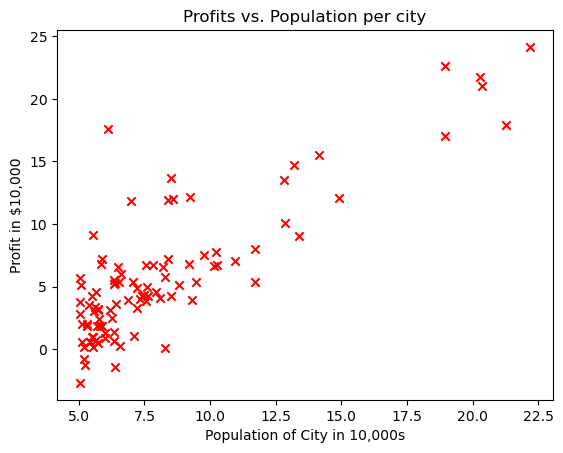

In [6]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

Your goal is to build a linear regression model to fit this data.
- With this model, you can then input a new city's population, and have the model estimate your restaurant's potential monthly profits for that city.

<a name="4"></a>
## 4 - Refresher on linear regression

In this practice lab, you will fit the linear regression parameters $(w,b)$ to your dataset.
- The model function for linear regression, which is a function that maps from `x` (city population) to `y` (your restaurant's monthly profit for that city) is represented as 
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city).

<a name="5"></a>
## 5 - Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

Please complete the `compute_cost()` function below to compute the cost $J(w,b)$.

<a name="ex01"></a>
### Exercise 1

Complete the `compute_cost` below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [7]:
# UNQ_C1
# GRADED FUNCTION: compute_cost

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    
    ### START CODE HERE ###
    for i in range(m):
        cost = ((w * x[i] + b)-y[i])**2
        total_cost += cost 
    total_cost = total_cost/(2*m) 
    ### END CODE HERE ### 

    return total_cost

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
   * You can represent a summation operator eg: $h = \sum\limits_{i = 0}^{m-1} 2i$ in code as follows:
    
    ```python 
    h = 0
    for i in range(m):
        h = h + 2*i
    ```
  
   * In this case, you can iterate over all the examples in `x` using a for loop and add the `cost` from each iteration to a variable (`cost_sum`) initialized outside the loop.

   * Then, you can return the `total_cost` as `cost_sum` divided by `2m`.
   * If you are new to Python, please check that your code is properly indented with consistent spaces or tabs. Otherwise, it might produce a different output or raise an `IndentationError: unexpected indent` error. You can refer to [this topic](https://community.deeplearning.ai/t/indentation-in-python-indentationerror-unexpected-indent/159398) in our community for details.

    <details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
    * Here's how you can structure the overall implementation for this function
    
    ```python 
    def compute_cost(x, y, w, b):
        # number of training examples
        m = x.shape[0] 
    
        # You need to return this variable correctly
        total_cost = 0
    
        ### START CODE HERE ###  
        # Variable to keep track of sum of cost from each example
        cost_sum = 0
    
        # Loop over training examples
        for i in range(m):
            # Your code here to get the prediction f_wb for the ith example
            f_wb = 
            # Your code here to get the cost associated with the ith example
            cost = 
        
            # Add to sum of cost for each example
            cost_sum = cost_sum + cost 

        # Get the total cost as the sum divided by (2*m)
        total_cost = (1 / (2 * m)) * cost_sum
        ### END CODE HERE ### 

        return total_cost
    ```
    
    * If you're still stuck, you can check the hints presented below to figure out how to calculate `f_wb` and `cost`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; For scalars $a$, $b$ and $c$ (<code>x[i]</code>, <code>w</code> and <code>b</code> are all scalars), you can calculate the equation $h = ab + c$ in code as <code>h = a * b + c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute f_wb as <code>f_wb = w * x[i] + b </code>
           </details>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate cost</b></font></summary>
          &emsp; &emsp; You can calculate the square of a variable z as z**2
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate cost</b></font></summary>
              &emsp; &emsp; You can compute cost as <code>cost = (f_wb - y[i]) ** 2</code>
          </details>
    </details>
        
    </details>

</details>

    


You can check if your implementation was correct by running the following test code:

In [8]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w:<b> 75.203 </td> 
  </tr>
</table>

<a name="6"></a>
## 6 - Gradient descent 

In this section, you will implement the gradient for parameters $w, b$ for linear regression. 

As described in the lecture videos, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

<a name="ex02"></a>
### Exercise 2

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [9]:
# UNQ_C2
# GRADED FUNCTION: compute_gradient
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ###
    
    for i in range(m):
        dj_dw += (((w*x[i])+b)-y[i])*x[i]
        dj_db += (((w*x[i])+b)-y[i])
    dj_dw = dj_dw/m
    dj_db = dj_db/m
        
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
   * You can represent a summation operator eg: $h = \sum\limits_{i = 0}^{m-1} 2i$ in code as follows:
    
   ```python 
    h = 0
    for i in range(m):
        h = h + 2*i
   ```
    
   * In this case, you can iterate over all the examples in `x` using a for loop and for each example, keep adding the gradient from that example to the variables `dj_dw` and `dj_db` which are initialized outside the loop. 

   * Then, you can return `dj_dw` and `dj_db` both divided by `m`.    
    <details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
    * Here's how you can structure the overall implementation for this function
    
    ```python 
    def compute_gradient(x, y, w, b): 
        """
        Computes the gradient for linear regression 
        Args:
          x (ndarray): Shape (m,) Input to the model (Population of cities) 
          y (ndarray): Shape (m,) Label (Actual profits for the cities)
          w, b (scalar): Parameters of the model  
        Returns
          dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
          dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
        """
    
        # Number of training examples
        m = x.shape[0]
    
        # You need to return the following variables correctly
        dj_dw = 0
        dj_db = 0
    
        ### START CODE HERE ### 
        # Loop over examples
        for i in range(m):  
            # Your code here to get prediction f_wb for the ith example
            f_wb = 
            
            # Your code here to get the gradient for w from the ith example 
            dj_dw_i = 
        
            # Your code here to get the gradient for b from the ith example 
            dj_db_i = 
     
            # Update dj_db : In Python, a += 1  is the same as a = a + 1
            dj_db += dj_db_i
        
            # Update dj_dw
            dj_dw += dj_dw_i
    
        # Divide both dj_dw and dj_db by m
        dj_dw = dj_dw / m
        dj_db = dj_db / m
        ### END CODE HERE ### 
        
        return dj_dw, dj_db
    ```
        
    * If you're still stuck, you can check the hints presented below to figure out how to calculate `f_wb` and `cost`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; You did this in the previous exercise! For scalars $a$, $b$ and $c$ (<code>x[i]</code>, <code>w</code> and <code>b</code> are all scalars), you can calculate the equation $h = ab + c$ in code as <code>h = a * b + c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute f_wb as <code>f_wb = w * x[i] + b </code>
           </details>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_dw_i</b></font></summary>
           &emsp; &emsp; For scalars $a$, $b$ and $c$ (<code>f_wb</code>, <code>y[i]</code> and <code>x[i]</code> are all scalars), you can calculate the equation $h = (a - b)c$ in code as <code>h = (a-b)*c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute dj_dw_i as <code>dj_dw_i = (f_wb - y[i]) * x[i] </code>
           </details>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_db_i</b></font></summary>
             &emsp; &emsp; You can compute dj_db_i as <code> dj_db_i = f_wb - y[i] </code>
    </details>
        
    </details>

</details>

    


Run the cells below to check your implementation of the `compute_gradient` function with two different initializations of the parameters $w$,$b$.

In [10]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


Now let's run the gradient descent algorithm implemented above on our dataset.

**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at initial , b (zeros)<b></td>
    <td> -65.32884975 -5.83913505154639</td> 
  </tr>
</table>

In [11]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at test w<b></td>
    <td> -47.41610118 -4.007175051546391</td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [12]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [13]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


**Expected Output**:
<table>
  <tr>
    <td> <b> w, b found by gradient descent<b></td>
    <td> 1.16636235 -3.63029143940436</td> 
  </tr>
</table>

We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [14]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

We will now plot the predicted values to see the linear fit.

Text(0.5, 0, 'Population of City in 10,000s')

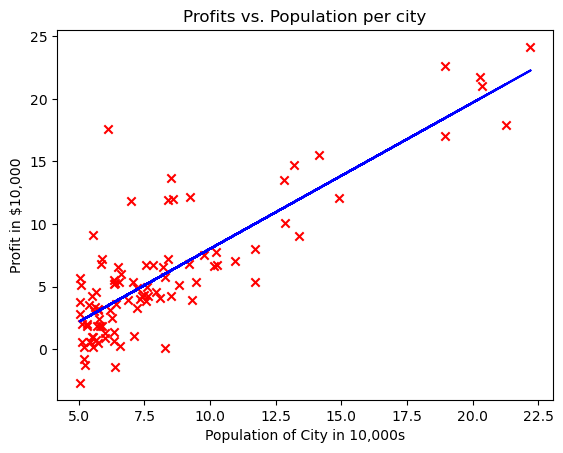

In [15]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

Your final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

- The model takes in population of a city in 10,000s as input. 

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`


In [16]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45


**Expected Output**:
<table>
  <tr>
    <td> <b> For population = 35,000, we predict a profit of<b></td>
    <td> $4519.77 </td> 
  </tr>
  
  <tr>
    <td> <b> For population = 70,000, we predict a profit of<b></td>
    <td> $45342.45 </td> 
  </tr>
</table>

**Congratulations on completing this practice lab on linear regression! Next week, you will create models to solve a different type of problem: classification. See you there!**

<details>
  <summary><font size="2" color="darkgreen"><b>Please click here if you want to experiment with any of the non-graded code.</b></font></summary>
    <p><i><b>Important Note: Please only do this when you've already passed the assignment to avoid problems with the autograder.</b></i>
    <ol>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “Edit Metadata”</li>
        <li> Hit the “Edit Metadata” button next to the code cell which you want to lock/unlock</li>
        <li> Set the attribute value for “editable” to:
            <ul>
                <li> “true” if you want to unlock it </li>
                <li> “false” if you want to lock it </li>
            </ul>
        </li>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “None” </li>
    </ol>
    <p> Here's a short demo of how to do the steps above: 
        <br>
        <img src="https://drive.google.com/uc?export=view&id=14Xy_Mb17CZVgzVAgq7NCjMVBvSae3xO1" align="center" alt="unlock_cells.gif">
</details>

# Optional  Lab: Cost Function 
<figure>
    <center> <img src="./images/C1_W1_L3_S2_Lecture_b.png"  style="width:1000px;height:200px;" ></center>
</figure>



## Goals
In this lab you will:
- you will implement and explore the `cost` function for linear regression with one variable. 


## Tools
In this lab we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- local plotting routines in the lab_utils_uni.py file in the local directory

In [17]:
!pip install -q ipympl

In [18]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('deeplearning.mplstyle')

## Problem Statement

You would like a model which can predict housing prices given the size of the house.  
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [19]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [20]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    print(x)
#     cost_sum = 0 
#     for i in range(m): 
#         f_wb = w * x[i] + b   
#         cost = (f_wb - y[i]) ** 2  
#         cost_sum = cost_sum + cost  
#     total_cost = (1 / (2 * m)) * cost_sum  
    cost = (1 / (2 * m)) * sum(var**2 for var in (y-(w * x + b) ))
    
    return cost
compute_cost(x_train,y_train,200,0)

[1. 2.]


5000.0

## Cost Function Intuition

<img align="left" src="./images/C1_W1_Lab02_GoalOfRegression.PNG"    style=" width:380px; padding: 10px;  " /> Your goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized. In this simple two point example, you can achieve this!

In the previous lab, you determined that $b=100$ provided an optimal solution so let's set $b$ to 100 and focus on $w$.

<br/>
Below, use the slider control to select the value of $w$ that minimizes cost. It can take a few seconds for the plot to update.

In [21]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

The plot contains a few points that are worth mentioning.
- cost is minimized when $w = 200$, which matches results from the previous lab
- Because the difference between the target and pediction is squared in the cost equation, the cost increases rapidly when $w$ is either too large or too small.
- Using the `w` and `b` selected by minimizing cost results in a line which is a perfect fit to the data.

## Cost Function Visualization- 3D

You can see how cost varies with respect to *both* `w` and `b` by plotting in 3D or using a contour plot.   
It is worth noting that some of the plotting in this course can become quite involved. The plotting routines are provided and while it can be instructive to read through the code to become familiar with the methods, it is not needed to complete the course successfully. The routines are in lab_utils_uni.py in the local directory.

### Larger Data Set
It is instructive to view a scenario with a few more data points. This data set includes data points that do not fall on the same line. What does that mean for the cost equation? Can we find $w$, and $b$ that will give us a cost of 0? 

In [22]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In the contour plot, click on a point to select `w` and `b` to achieve the lowest cost. Use the contours to guide your selections. Note, it can take a few seconds to update the graph. 

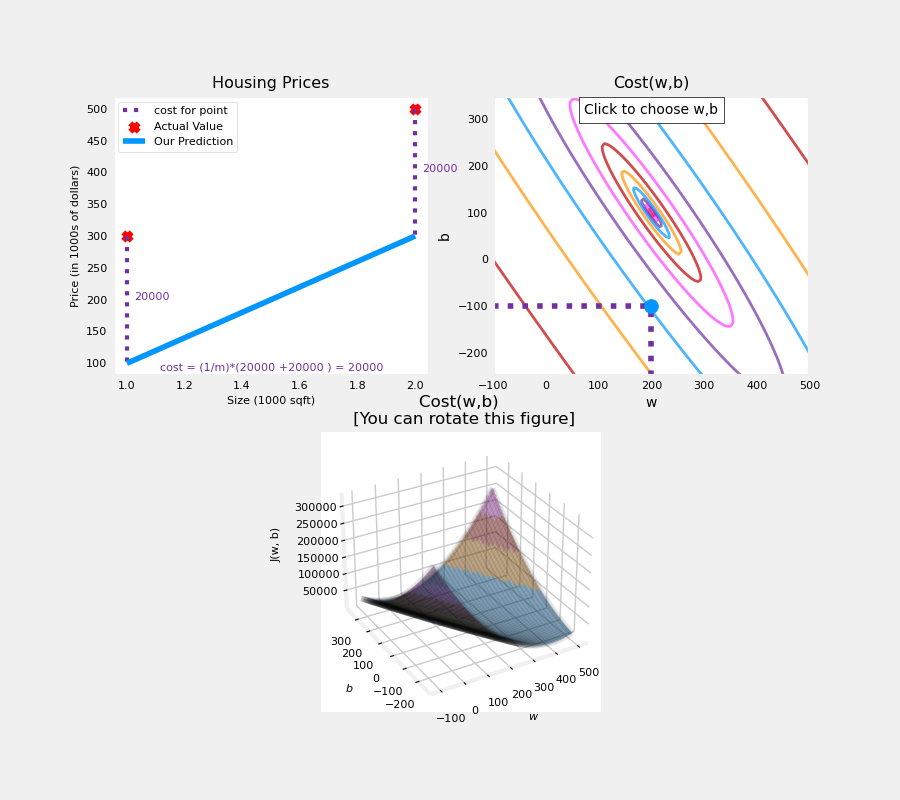

In [38]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

Above, note the dashed lines in the left plot. These represent the portion of the cost contributed by each example in your training set. In this case, values of approximately $w=209$ and $b=2.4$ provide low cost. Note that, because our training examples are not on a line, the minimum cost is not zero.

### Convex Cost surface
The fact that the cost function squares the loss ensures that the 'error surface' is convex like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions. In the previous plot, because the $w$ and $b$ dimensions scale differently, this is not easy to recognize. The following plot, where $w$ and $b$ are symmetric, was shown in lecture:

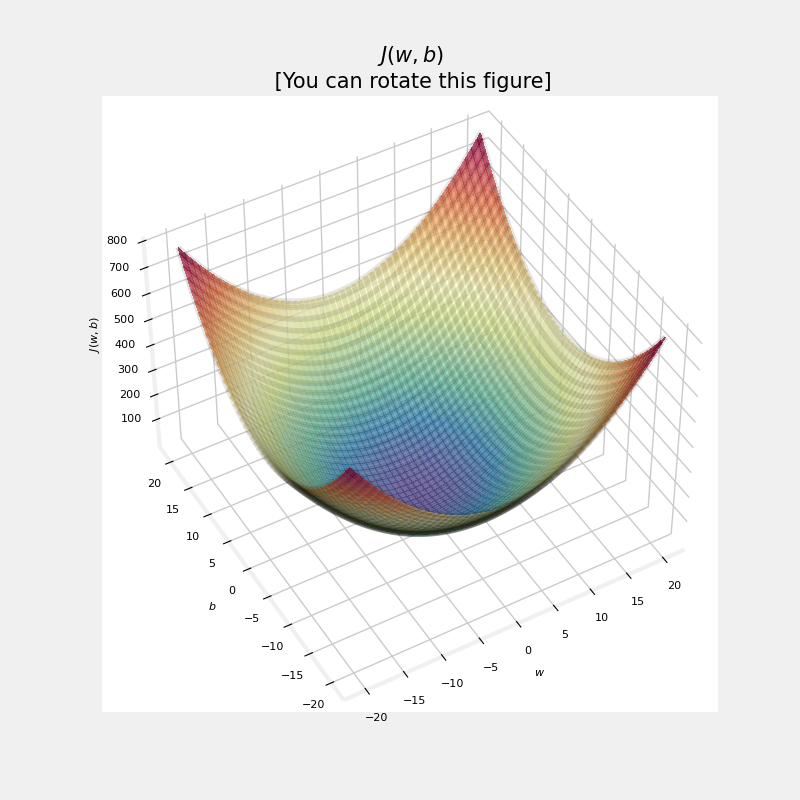

In [24]:
soup_bowl()

# Congratulations!
You have learned the following:
 - The cost equation provides a measure of how well your predictions match your training data.
 - Minimizing the cost can provide optimal values of $w$, $b$.

# Optional Lab: Gradient Descent for Linear Regression

<figure>
    <center> <img src="./images/C1_W1_L4_S1_Lecture_GD.png"  style="width:800px;height:200px;" ></center>
</figure>

## Goals
In this lab, you will:
- automate the process of optimizing $w$ and $b$ using gradient descent.

## Tools
In this lab, we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- plotting routines in the lab_utils.py file in the local directory

In [25]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

<a name="toc_40291_2"></a>
# Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |


In [26]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

<a name="toc_40291_2.0.1"></a>
### Compute_Cost
This was developed in the last lab. We'll need it again here.

In [27]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost  

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [28]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

<br/>

<img align="left" src="./images/C1_W1_Lab03_lecture_slopes.PNG"   style="width:340px;" > The lectures described how gradient descent utilizes the partial derivative of the cost with respect to a parameter at a point to update that parameter.   
Let's use our `compute_gradient` function to find and plot some partial derivatives of our cost function relative to one of the parameters, $w_0$.


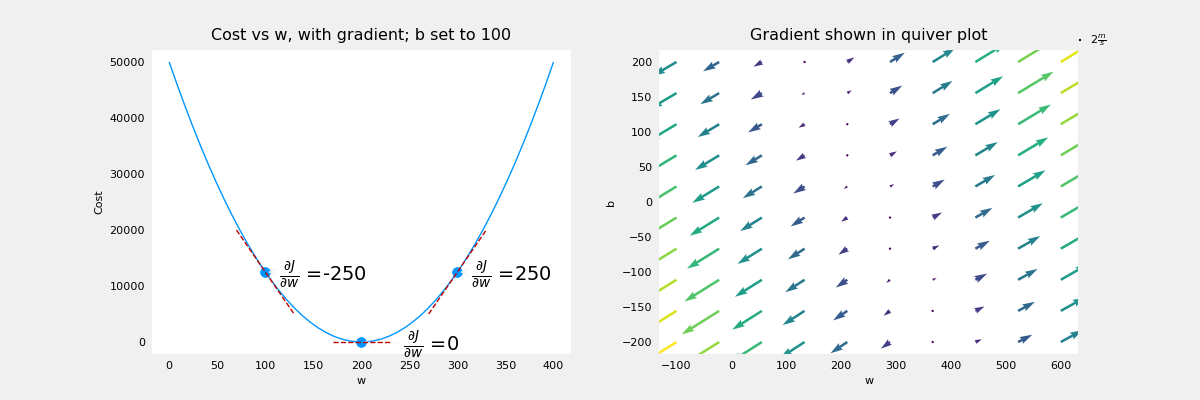

In [29]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

Above, the left plot shows $\frac{\partial J(w,b)}{\partial w}$ or the slope of the cost curve relative to $w$ at three points. On the right side of the plot, the derivative is positive, while on the left it is negative. Due to the 'bowl shape', the derivatives will always lead gradient descent toward the bottom where the gradient is zero.
 
The left plot has fixed $b=100$. Gradient descent will utilize both $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ to update parameters. The 'quiver plot' on the right provides a means of viewing the gradient of both parameters. The arrow sizes reflect the magnitude of the gradient at that point. The direction and slope of the arrow reflects the ratio of $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ at that point.
Note that the gradient points *away* from the minimum. Review equation (3) above. The scaled gradient is *subtracted* from the current value of $w$ or $b$. This moves the parameter in a direction that will reduce cost.

<a name="toc_40291_2.5"></a>
###  Gradient Descent
Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $w$ and $b$ on the training data.

In [30]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [31]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


<img align="left" src="./images/C1_W1_Lab03_lecture_learningrate.PNG"  style="width:340px; padding: 15px; " > 
Take a moment and note some characteristics of the gradient descent process printed above.  

- The cost starts large and rapidly declines as described in the slide from the lecture.
- The partial derivatives, `dj_dw`, and `dj_db` also get smaller, rapidly at first and then more slowly. As shown in the diagram from the lecture, as the process nears the 'bottom of the bowl' progress is slower due to the smaller value of the derivative at that point.
- progress slows though the learning rate, alpha, remains fixed

### Cost versus iterations of gradient descent 
A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

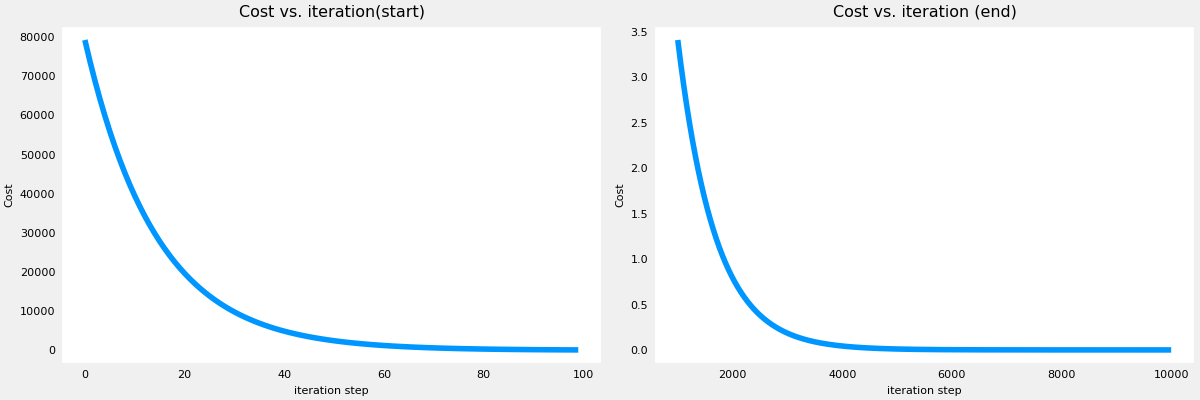

In [32]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

### Predictions
Now that you have discovered the optimal values for the parameters $w$ and $b$, you can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [33]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


<a name="toc_40291_2.6"></a>
## Plotting
You can show the progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b). 

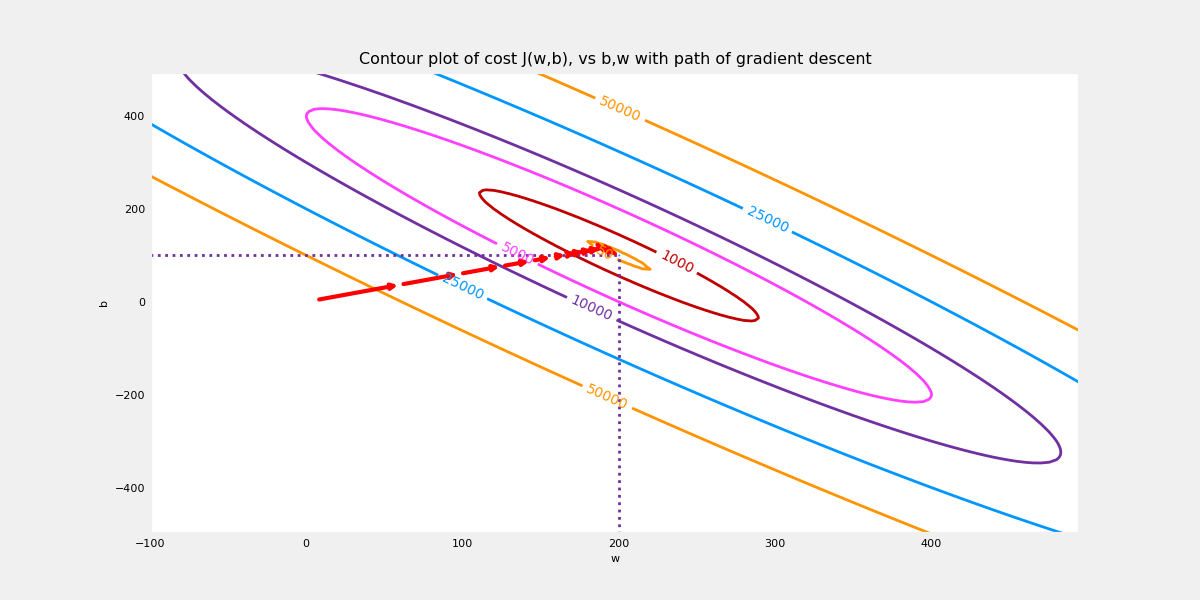

In [34]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

Above, the contour plot shows the $cost(w,b)$ over a range of $w$ and $b$. Cost levels are represented by the rings. Overlayed, using red arrows, is the path of gradient descent. Here are some things to note:
- The path makes steady (monotonic) progress toward its goal.
- initial steps are much larger than the steps near the goal.

**Zooming in**, we can see that final steps of gradient descent. Note the distance between steps shrinks as the gradient approaches zero.

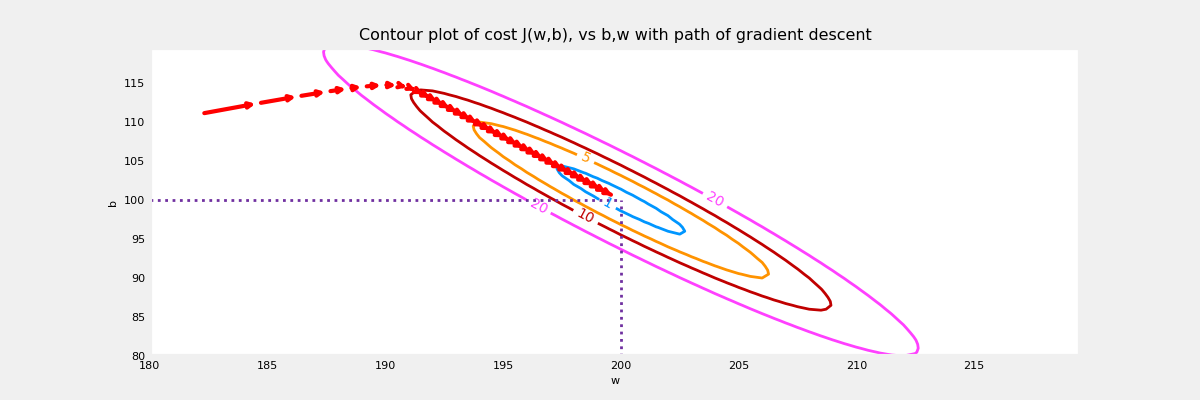

In [35]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

<a name="toc_40291_2.7.1"></a>
### Increased Learning Rate

<figure>
 <img align="left", src="./images/C1_W1_Lab03_alpha_too_big.PNG"   style="width:340px;height:240px;" >
</figure>
In the lecture, there was a discussion related to the proper value of the learning rate, $\alpha$ in equation(3). The larger $\alpha$ is, the faster gradient descent will converge to a solution. But, if it is too large, gradient descent will diverge. Above you have an example of a solution which converges nicely.

Let's try increasing the value of  $\alpha$ and see what happens:

In [36]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


Above, $w$ and $b$ are bouncing back and forth between positive and negative with the absolute value increasing with each iteration. Further, each iteration $\frac{\partial J(w,b)}{\partial w}$ changes sign and cost is increasing rather than decreasing. This is a clear sign that the *learning rate is too large* and the solution is diverging. 
Let's visualize this with a plot.

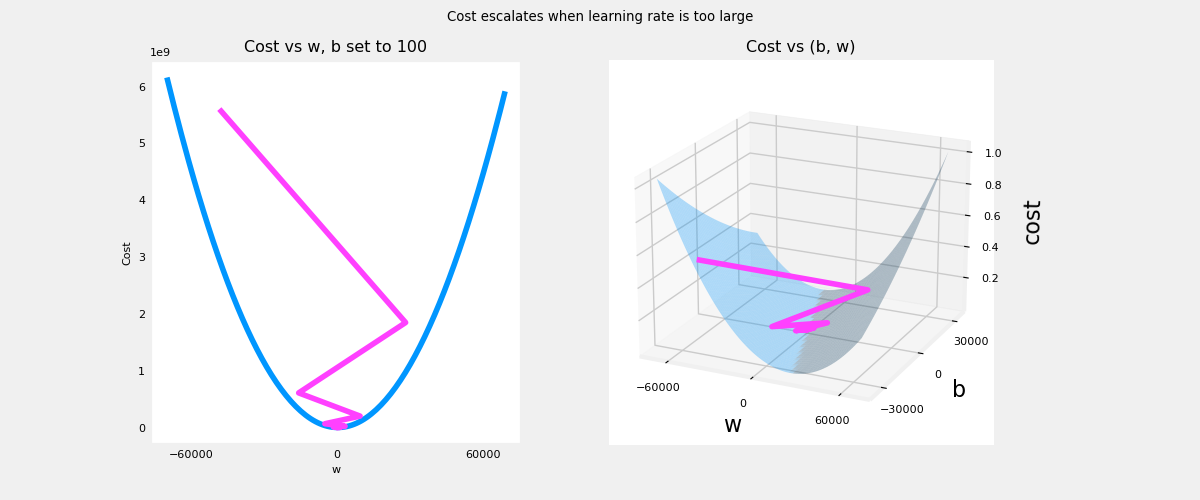

In [39]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

Above, the left graph shows $w$'s progression over the first few steps of gradient descent. $w$ oscillates from positive to negative and cost grows rapidly. Gradient Descent is operating on both $w$ and $b$ simultaneously, so one needs the 3-D plot on the right for the complete picture.


## Congratulations!
In this lab you:
- delved into the details of gradient descent for a single variable.
- developed a routine to compute the gradient
- visualized what the gradient is
- completed a gradient descent routine
- utilized gradient descent to find parameters
- examined the impact of sizing the learning rate